In [2]:
import sqlite3 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Calculez entre 2019 et 2022 la somme du nombre d’objets trouvés par semaine. Afficher sur un histogramme plotly la répartition de ces valeurs. (un point correspond à une semaine dont la valeur est la somme). (On peut choisir d’afficher ou non certains types d’objet).

In [4]:
df= pd.read_csv("concat.csv")
daf=df[['fields.gc_obo_type_c', 'fields.gc_obo_gare_origine_r_name','fields.date']]
daf.rename(columns={"fields.date":"date"},inplace=True)
daf.rename(columns={"fields.gc_obo_type_c":"type"},inplace=True)
daf.rename(columns={"fields.gc_obo_gare_origine_r_name":"nom_gare"},inplace=True)
# daf['date'] = daf['date'].str.slice(stop=10)
daf['date']=daf['date'].apply(lambda x : x [:10])
daf

/tmp/ipykernel_77315/827910197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daf.rename(columns={"fields.date":"date"},inplace=True)
/tmp/ipykernel_77315/827910197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daf.rename(columns={"fields.gc_obo_type_c":"type"},inplace=True)
/tmp/ipykernel_77315/827910197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daf.rename(columns={"fields.gc_obo_gare_origine_r_name":"nom_gare"},i

,type,nom_gare,date
0,"Porte-monnaie / portefeuille, argent, titres",Paris Est,2022-01-03
1,"Porte-monnaie / portefeuille, argent, titres",Paris Est,2022-01-03
2,"Bagagerie: sacs, valises, cartables",Paris Est,2022-01-03
3,Pièces d'identités et papiers personnels,Paris Est,2022-01-03
4,"Appareils électroniques, informatiques, appare...",Paris Est,2022-01-03
...,...,...,...
81627,"Bagagerie: sacs, valises, cartables",Paris Bercy,2022-12-27
81628,"Bagagerie: sacs, valises, cartables",Paris Bercy,2022-12-27
81629,"Clés, porte-clés, badge magnétique",Paris Bercy,2022-12-27
81630,"Bagagerie: sacs, valises, cartables",Paris Bercy,2022-12-28


In [6]:
# fig = px.histogram(daf, x='date', nbins=200, title='Histogramme des objets perdus par semaine')
# fig.update_xaxes(
#     tickformat="%b %Y",
#     dtick="W1",
#     ticklabelmode="period"
# )

# # Afficher le graphique
# fig.show()

In [ ]:
fig = px.line(df, x = 'week', y = 'objets_perdu', title='Apple Share Prices over time (2014)')
fig.show()

#Afficher une carte de Paris avec le nombre d’objets trouvés en fonction de la fréquentation de voyageur de chaque gare. Possibilité de faire varier par année et par type d’objets

In [7]:
df_gare = pd.read_csv("infos_gares.csv")

In [ ]:
import folium 


m = folium.Map(location=[48.856614, 2.3522219], zoom_start=13)

for i in range(len(df_gare)):
    nom_gare = df_gare.loc[i, "nom_gare"]
    frequent_2019 = df_gare.loc[i, "frequent_2019"]
    frequent_2020 = df_gare.loc[i, "frequent_2020"]
    frequent_2021 = df_gare.loc[i, "frequent_2021"]
    lat = df_gare.loc[i, "lat"]
    long = df_gare.loc[i, "long"]
        
    objet_trouve_2019 = df_gare.loc[i,"objet_trouve_2019"]
    objet_trouve_2020 = df_gare.loc[i,"objet_trouve_2020"]
    objet_trouve_2021 = df_gare.loc[i,"objet_trouve_2021"]
    objet_trouve_2022 = df_gare.loc[i,"objet_trouve_2022"]
    
    popup_text = f"Nom de la gare: {nom_gare}<br>Fréquentation en 2019: {frequent_2019:,.0f}<br>Fréquentation en 2020: {frequent_2020:,.0f}<br>Fréquentation en 2021: {frequent_2021:,.0f}<br>Objet trouvé en 2019: {objet_trouve_2019:,.0f}<br>Objet trouvé en 2020: {objet_trouve_2020:,.0f}<br>Objet trouvé en 2021: {objet_trouve_2021:,.0f}<br>Objet trouvé en 2022: {objet_trouve_2022:,.0f}"
    
    marker = folium.Marker(location=[lat, long], radius=2, fill=True)
    popup = folium.Popup(popup_text, max_width=300)
    
    marker.add_child(popup)
    marker.add_to(m)

m.save("m.html")

#Afficher le nombre d’objets trouvés en fonction de la température sur un scatterplot. Est ce que le nombre d’objets perdus est corrélé à la temperature d'après ce graphique?

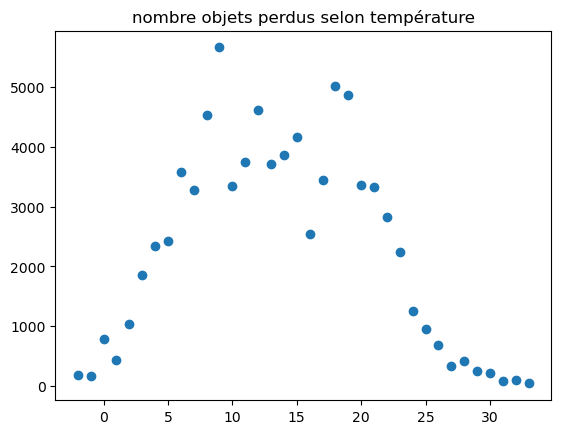

In [1]:
import sqlite3 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

connexion=sqlite3.connect('bddt.db')
curseur= connexion.cursor()
    
curseur.execute("""
                    SELECT meteo.temperature, COUNT(objets_trouves.id) 
                    FROM objets_trouves
                    JOIN meteo ON objets_trouves.date_meteo = meteo.date
                    GROUP BY meteo.temperature
                    
                     
                    
                    """)
data=curseur.fetchall()

x = [point[0] for point in data]
y = [point[1] for point in data]

# Création du scatter plot
plt.scatter(x, y)
plt.title("nombre objets perdus selon température")
# Affichage du scatter plot
plt.show()

# fig = px.scatter(df, x="temperature", y="nb_objets")

# # Afficher le graphique
# fig.show()

#Quelle est la médiane du nombre d’objets trouvés en fonction de la saison? Il y a t il une correlation entre ces deux variables d'après le graphique?

In [7]:
connexion=sqlite3.connect('bddt.db')
curseur= connexion.cursor()
    
curseur.execute("""
                    SELECT saison.saison, COUNT(DISTINCT objets_trouves.id)
                    FROM objets_trouves
                    INNER JOIN saison ON objets_trouves.data = saison.date
                    GROUP BY objets_trouves.data, saison.saison                 
                                                
                    """)
temp=curseur.fetchall()
temp

[('hiver', 5),
 ('hiver', 90),
 ('hiver', 107),
 ('hiver', 84),
 ('hiver', 78),
 ('hiver', 54),
 ('hiver', 119),
 ('hiver', 57),
 ('hiver', 59),
 ('hiver', 72),
 ('hiver', 61),
 ('hiver', 34),
 ('hiver', 2),
 ('hiver', 94),
 ('hiver', 90),
 ('hiver', 78),
 ('hiver', 60),
 ('hiver', 71),
 ('hiver', 55),
 ('hiver', 49),
 ('hiver', 129),
 ('hiver', 68),
 ('hiver', 73),
 ('hiver', 59),
 ('hiver', 79),
 ('hiver', 54),
 ('hiver', 10),
 ('hiver', 81),
 ('hiver', 80),
 ('hiver', 82),
 ('hiver', 71),
 ('hiver', 67),
 ('hiver', 58),
 ('hiver', 17),
 ('hiver', 122),
 ('hiver', 93),
 ('hiver', 75),
 ('hiver', 80),
 ('hiver', 83),
 ('hiver', 62),
 ('hiver', 18),
 ('hiver', 111),
 ('hiver', 121),
 ('hiver', 91),
 ('hiver', 82),
 ('hiver', 76),
 ('hiver', 77),
 ('hiver', 3),
 ('hiver', 88),
 ('hiver', 131),
 ('hiver', 94),
 ('hiver', 54),
 ('hiver', 72),
 ('hiver', 41),
 ('hiver', 13),
 ('hiver', 92),
 ('hiver', 142),
 ('hiver', 98),
 ('hiver', 66),
 ('hiver', 79),
 ('hiver', 70),
 ('hiver', 6),
 ('h

In [8]:


# dictionnaire qui reprend, pour chaque saison, une valeur d'objets trouvés par jour
saisons = {}
for saison, valeur in temp:
    if saison not in saisons:
        saisons[saison] = []
    saisons[saison].append(valeur)

# à partir dictionnaire, reprise de la valeur médiane(à partir des valeurs de chaque saison)
for saison, valeurs in saisons.items():
    mediane = np.median(valeurs)
    print(f"La valeur médiane pour la saison {saison} est {mediane}.")

La valeur médiane pour la saison hiver est 55.5.
La valeur médiane pour la saison printemps est 46.0.
La valeur médiane pour la saison été est 65.0.
La valeur médiane pour la saison automne est 59.0.


#"Affichez le nombre d'objets trouvés en fonction du type de d'objet et de la saison sur un graphique. Il y a t il une correlation entre ces deux variables d'après le graphique?"

In [3]:
import sqlite3
connexion=sqlite3.connect('bddt.db')
curseur= connexion.cursor()
    
curseur.execute("""
                    SELECT saison.saison, objets_trouves.typo, COUNT(objets_trouves.id) AS nb_objets
                    FROM objets_trouves
                    JOIN saison ON objets_trouves.date_meteo = saison.date
                    GROUP BY objets_trouves.typo, saison.saison
                     
                    
                    """)
dernier=curseur.fetchall()
dernier

[('automne',
  'Appareils électroniques, informatiques, appareils photo',
  234535),
 ('hiver', 'Appareils électroniques, informatiques, appareils photo', 226080),
 ('printemps',
  'Appareils électroniques, informatiques, appareils photo',
  207647),
 ('été', 'Appareils électroniques, informatiques, appareils photo', 268237),
 ('automne', "Articles d'enfants, de puériculture", 8589),
 ('hiver', "Articles d'enfants, de puériculture", 10881),
 ('printemps', "Articles d'enfants, de puériculture", 8336),
 ('été', "Articles d'enfants, de puériculture", 17864),
 ('automne', 'Articles de sport, loisirs, camping', 7440),
 ('hiver', 'Articles de sport, loisirs, camping', 8916),
 ('printemps', 'Articles de sport, loisirs, camping', 6836),
 ('été', 'Articles de sport, loisirs, camping', 21137),
 ('automne', 'Articles médicaux', 7318),
 ('hiver', 'Articles médicaux', 7777),
 ('printemps', 'Articles médicaux', 7079),
 ('été', 'Articles médicaux', 7813),
 ('automne', 'Bagagerie: sacs, valises, carta

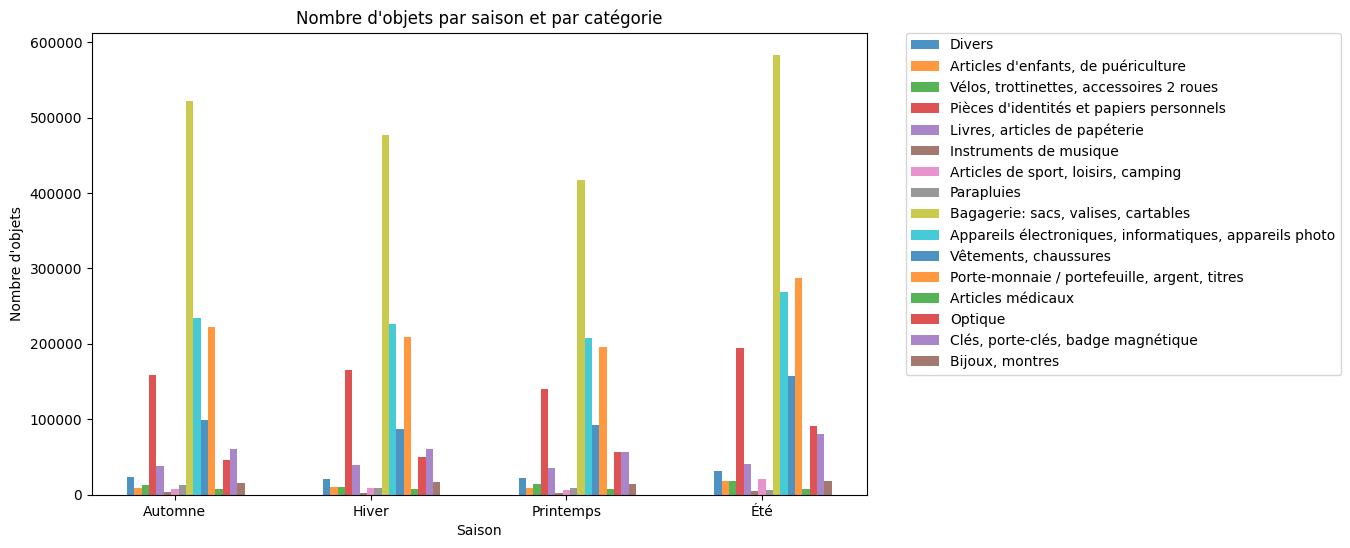

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data = {}
categories = set([x[1] for x in dernier])
#là t'as une liste de toutes les catégories qui ont été créé
n_categories = len(categories)
#reprend le nombre de types différent d'objets
palette = sns.color_palette(n_colors=n_categories)
#on demande une couleur pr chaque entité de catégorie
for saison in ['automne', 'hiver', 'printemps', 'été']:
    data[saison] = []
    #on crée une nouvelle clé (ds le dico "data" pr chaque saison)
    for categorie in categories:
        #on itére sur chaque catégorie à partir de la saison>> [ex: automne-appareil photo puis jouet etc]
        objets_saison = [x[2] for x in dernier if x[0] == saison and x[1] == categorie]
        #x[2]>> correspond au nombre d'objets pr chaque cat
        #ainsi si [x catégorie] = saison qu'on itére T0, et à la catégorie, on l'ajoute à la liste 
        #on itére sur chaque ligne: 
        # if objets_saison:
        data[saison].append(sum(objets_saison))
        #on fait la somme du nbre d'objets de la liste de automne/jouets (par ex)
       
        # else:
        #     data[saison].append(0)

# Créer les barres groupées
n_seasons = len(data)
bar_width = 0.6 / n_categories
opacity = 0.8
index = np.arange(n_seasons)
#variable est utilisée pour positionner les barres sur l'axe des x lors de la création du graphique à barres
for i, categorie in enumerate(categories):
    plt.bar(index + i*bar_width, [data[saison][i] for saison in data], bar_width,
            alpha=opacity, color=palette[i], label=categorie)

# Personnaliser le graphique
plt.xlabel('Saison')
plt.ylabel('Nombre d\'objets')
plt.title('Nombre d\'objets par saison et par catégorie')
plt.xticks(index + bar_width*6, ['Automne', 'Hiver', 'Printemps', 'Été'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.gcf().set_size_inches(10, 6)
plt.show()